In [1]:
import pandas as pd


df = pd.read_csv("covid_19.csv") 


print(df.head())


print(df.columns)


     country     region  region_code  start_date    end_date  days  year  \
0  Australia  Australia            0  2019-12-30  2020-01-05     7  2020   
1  Australia  Australia            0  2020-01-06  2020-01-12     7  2020   
2  Australia  Australia            0  2020-01-13  2020-01-19     7  2020   
3  Australia  Australia            0  2020-01-20  2020-01-26     7  2020   
4  Australia  Australia            0  2020-01-27  2020-02-02     7  2020   

   week  population  total_deaths  covid_deaths  expected_deaths  \
0     1    25921089        2926.0             0      2965.372893   
1     2    25921089        2902.0             0      2956.539560   
2     3    25921089        2914.0             0      2932.039560   
3     4    25921089        3007.0             0      2940.372893   
4     5    25921089        2910.0             0      2900.039560   

   excess_deaths  non_covid_deaths  covid_deaths_per_100k  \
0     -39.372893            2926.0                    0.0   
1     -54.53

In [7]:

print(df.columns)

df.columns = df.columns.str.strip()


if 'region' in df.columns:
    region_cases = df.groupby("region")[["covid_deaths", "total_deaths", "population"]].sum()

    print(region_cases)
else:
    print("Error: 'region' column not found in DataFrame")


Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')
                covid_deaths  total_deaths   population
region                                                 
Australia               5900      377170.0   3032767413
Austria                20025      227019.0   1168792742
Belgium                31973      295727.0   1497873180
Britain               176528     1691666.0   8813816240
Bulgaria               37163      332322.0    874505236
Canada                 36509      675940.0   4311516356
Chile                  46527      337033.0   2573100288
Colombia              140202      820104.0   6800186184
Croatia                15998      146469.0    515637145
Cyprus                  1067       17022.0    113792889
Cze

In [14]:
df_filtered = df[df["covid_deaths"] >= 15]


In [12]:
print(df.columns)
# Remove rows where confirmed cases are less than 15
df_filtered = df[df["covid_deaths"] >= 15]

# Display updated dataset
print(df_filtered.head())


Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')
      country     region  region_code  start_date    end_date  days  year  \
13  Australia  Australia            0  2020-03-30  2020-04-05     7  2020   
14  Australia  Australia            0  2020-04-06  2020-04-12     7  2020   
16  Australia  Australia            0  2020-04-20  2020-04-26     7  2020   
28  Australia  Australia            0  2020-07-13  2020-07-19     7  2020   
29  Australia  Australia            0  2020-07-20  2020-07-26     7  2020   

    week  population  total_deaths  covid_deaths  expected_deaths  \
13    14    25921089        3217.0            19      2997.247472   
14    15    25921089        3140.0            25      3042.647472   
16   

In [15]:
df_filtered = df[df["total_deaths"] >= 15]

In [16]:
print(df.columns)
# Remove rows where confirmed cases are less than 15
df_filtered = df[df["total_deaths"] >= 15]

# Display updated dataset
print(df_filtered.head())


Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')
     country     region  region_code  start_date    end_date  days  year  \
0  Australia  Australia            0  2019-12-30  2020-01-05     7  2020   
1  Australia  Australia            0  2020-01-06  2020-01-12     7  2020   
2  Australia  Australia            0  2020-01-13  2020-01-19     7  2020   
3  Australia  Australia            0  2020-01-20  2020-01-26     7  2020   
4  Australia  Australia            0  2020-01-27  2020-02-02     7  2020   

   week  population  total_deaths  covid_deaths  expected_deaths  \
0     1    25921089        2926.0             0      2965.372893   
1     2    25921089        2902.0             0      2956.539560   
2     3    259

In [17]:
# Find the region with the highest confirmed cases
max_region = df.groupby("region")["covid_deaths"].sum().idxmax()
max_cases = df.groupby("region")["covid_deaths"].sum().max()

print(f"region with the highest confirmed cases: {max_region}, Cases: {max_cases}")


region with the highest confirmed cases: United States, Cases: 1011492


C:\Users\Asus\AppData\Local\Temp\ipykernel_15772\76860805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_cases_sorted.index, y=region_cases_sorted["covid_deaths"], palette="coolwarm")


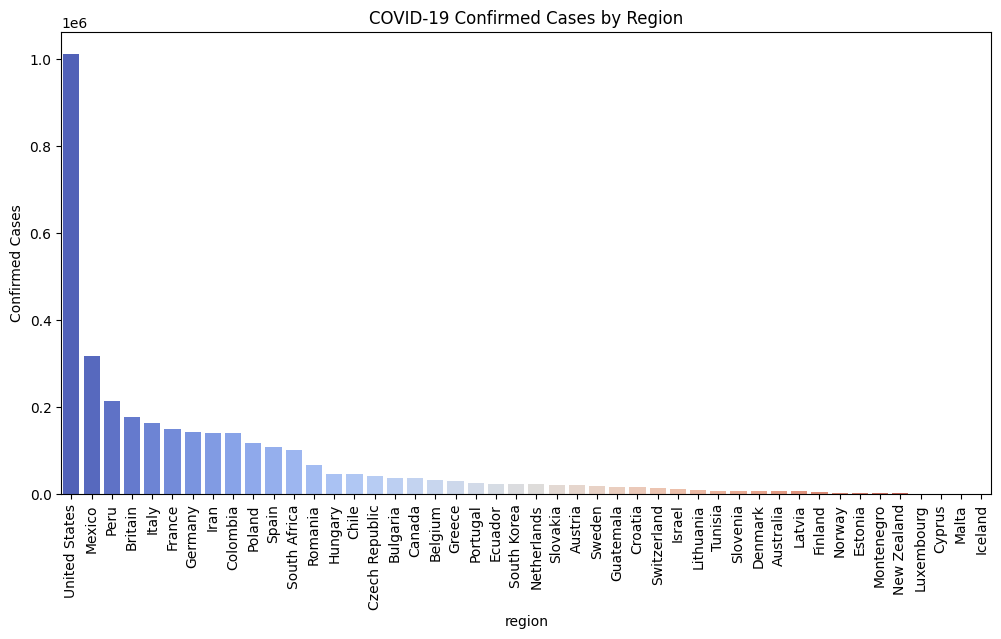

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


region_cases_sorted = region_cases.sort_values(by="covid_deaths", ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=region_cases_sorted.index, y=region_cases_sorted["covid_deaths"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("COVID-19 Confirmed Cases by Region")
plt.xlabel("region")
plt.ylabel("Confirmed Cases")
plt.show()


In [19]:
df_filtered.to_csv("covid_19.csv", index=False)
